# IMPORTAÇÕES DE DEPENDÊNCIAS DO PROJETO

In [259]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import warnings
import re

warnings.filterwarnings("ignore")

# LEITURA DA TABELA

In [260]:
table = Path("most_popular_programming_languages​_from_2004_to_2022.csv").absolute()

df = pd.read_csv(table)
print(df)

               Date  Abap   Ada  C/C++    C#  Cobol  Dart  Delphi/Pascal  \
0         July 2004  0.34  0.36  10.08  4.71   0.43  0.00           2.82   
1       August 2004  0.36  0.36   9.81  4.99   0.46  0.00           2.67   
2    September 2004  0.41  0.41   9.63  5.06   0.51  0.00           2.65   
3      October 2004  0.40  0.38   9.50  5.31   0.53  0.00           2.77   
4     November 2004  0.38  0.38   9.52  5.24   0.55  0.00           2.76   
..              ...   ...   ...    ...   ...    ...   ...            ...   
206  September 2021  0.50  0.55   6.68  7.17   0.35  0.58           0.00   
207    October 2021  0.53  0.57   6.99  7.38   0.33  0.55           0.00   
208   November 2021  0.61  0.70   6.99  7.31   0.35  0.61           0.00   
209   December 2021  0.70  0.67   7.01  7.26   0.33  0.65           0.00   
210    January 2022  0.66  0.75   7.40  7.27   0.30  0.72           0.00   

       Go  Groovy  ...    PHP  Python     R  Ruby  Rust  Scala  Swift  \
0    0.00    0

# LIMPEZA DE DADOS

In [261]:
df.isna().sum()

Date             0
Abap             0
Ada              0
C/C++            0
C#               0
Cobol            0
Dart             0
Delphi/Pascal    0
Go               0
Groovy           0
Haskell          0
Java             0
JavaScript       0
Julia            0
Kotlin           0
Lua              0
Matlab           0
Objective-C      0
Perl             0
PHP              0
Python           0
R                0
Ruby             0
Rust             0
Scala            0
Swift            0
TypeScript       0
VBA              0
Visual Basic     0
dtype: int64

In [262]:
df["Date"] = pd.to_datetime(df["Date"])


# visualização de dados

In [263]:
sns.set_theme(style="darkgrid")


def generate_color_series(n: int, palette: str) -> tuple:
    segments = cm.get_cmap(palette, n)
    return segments(range(n))


Text(0, 0.5, 'Linguagens de programação')

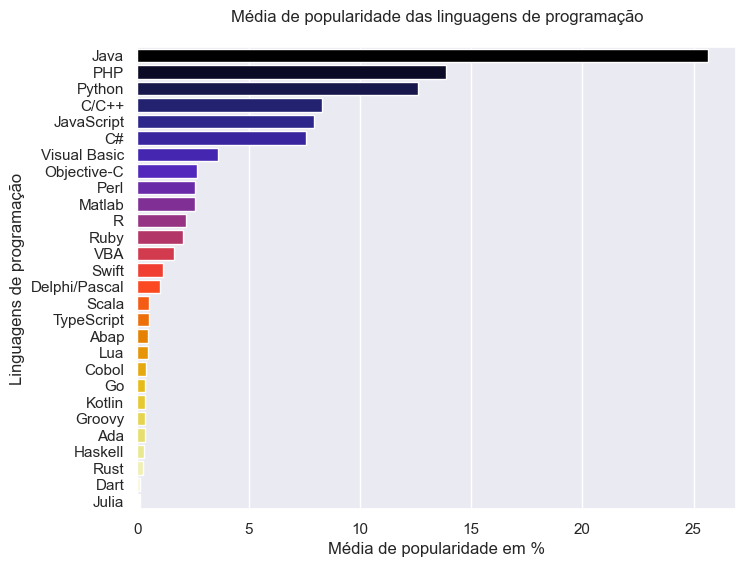

In [264]:
data_mean_list = []

for column in df:
    if column == "Date":
        pass
    else:
        data_mean_list.append([column, df[column].mean()])

data_mean = pd.DataFrame(data_mean_list, columns=["language", "mean"])
data_mean = data_mean.sort_values(by=["mean"], ascending=False)

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.title("Média de popularidade das linguagens de programação\n")
sns.barplot(
    data=data_mean,
    x="mean",
    y="language",
    saturation=1,
    palette=generate_color_series(n=28, palette="CMRmap")
)
plt.xlabel("Média de popularidade em %")
plt.ylabel("Linguagens de programação")

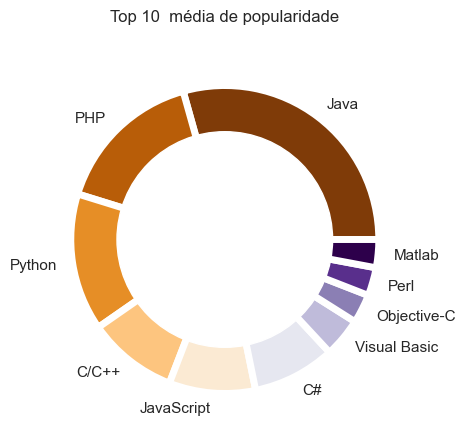

In [265]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data_mean_top10 = data_mean.nlargest(10, "mean")
plt.title("Top 10  média de popularidade\n")
donut_top10 = plt.Circle((0, 0), 0.7, color="white")
plt.pie(
    data_mean_top10["mean"], 
    labels=data_mean_top10["language"],
    wedgeprops={
        "linewidth": 5,
        "edgecolor": "white",
    },
    colors=generate_color_series(n=10, palette="PuOr")
)
plot = plt.gcf()
plot.gca().add_artist(donut_top10)

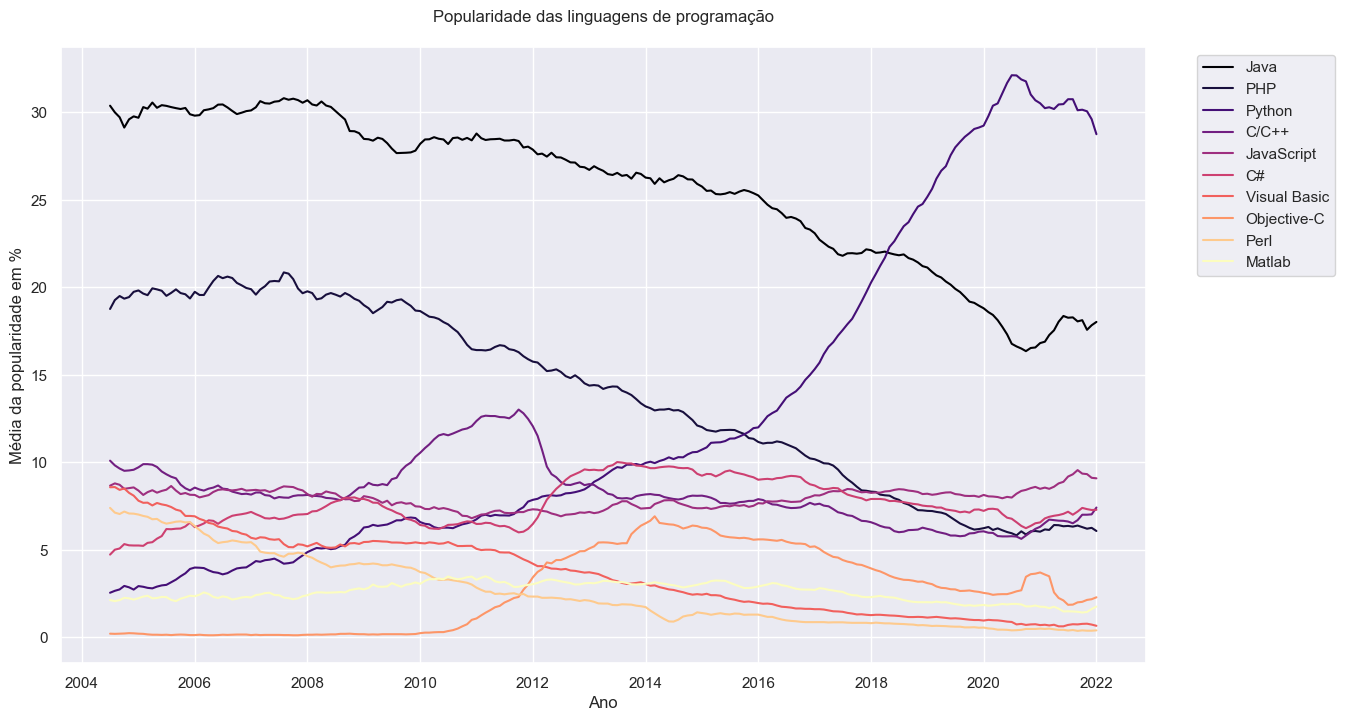

In [266]:
top10_linechart_color = generate_color_series(n=10, palette="magma")
plt.figure(figsize=(14, 8))

for index, element in enumerate(data_mean["language"]):
    plt.plot(
        df["Date"],
        df[element],
        color=top10_linechart_color[index],
        label=element
    )
    plt.legend()

    if index == 9:
        break

plt.title("Popularidade das linguagens de programação\n")
plt.xlabel("Ano")
plt.ylabel("Média da popularidade em %")

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


# ANIMAÇÃO DAS PLOTS

In [267]:
# dict_data = df.copy()
# dict_data.drop(["Date"], axis=1, inplace=True)
# series_data = dict_data.to_dict()

# bar_label = [key for key in dict_data]

# bar_color = generate_color_series(n=28, palette="CMRmap")

# fig = plt.figure(figsize=(11, 9))
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xlim(0, 35)


# def animate(i: int):
#     i_value = []
#     for key in dict_data:
#         i_value.append(dict_data[key][i])

#     i_value = tuple(i_value)
#     date_bar = df.Date[i].strftime("%Y %B")
#     ax.cla()
#     ax.set_xlim(0, 35)
#     ax.barh(bar_label, i_value, color=bar_color)
#     ax.set_title(f"Popularidade em % em: {date_bar}", loc="left")
#     plt.gca().invert_yaxis()


# ani = FuncAnimation(
#     fig,
#     animate,
#     repeat=False,
#     frames=len(dict_data)
# )
# %time ani.save("bar_animation.gif", writer="imagemagick", fps=5)
# plt.close()


# How much a data scientist get (data + analyzing )

In [268]:
data = pd.read_csv(Path("./Salary_Dataset.csv"))

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [270]:
data.describe(include=["object"])

,Company Name,Job Title,Location,Salary
count,4341,4344,4344,4344
unique,2529,26,5,3101
top,Tata Consultancy Services,Data Scientist,Bangalore,"₹12,00,000/yr"
freq,41,1844,1584,24


In [271]:
data.Salary = data.Salary.apply(lambda x : x.split('/')[0]) 

```
try to get the salary into integer
```

In [272]:
data.Salary = data.Salary.apply(lambda x: x[1:])

In [273]:
data.Salary = data.Salary.apply(lambda x : ''.join(x.split(',')))

In [274]:
data = data.drop([2278] , axis = 0)

```
convert the string to numeric
```

In [275]:

data.Salary = pd.to_numeric(data['Salary'])

```
convert the indian money into american dollar
```

In [276]:

data.Salary = data.Salary * 0.01311   

# hist plot for salary

Text(0, 0.5, 'frequencies')

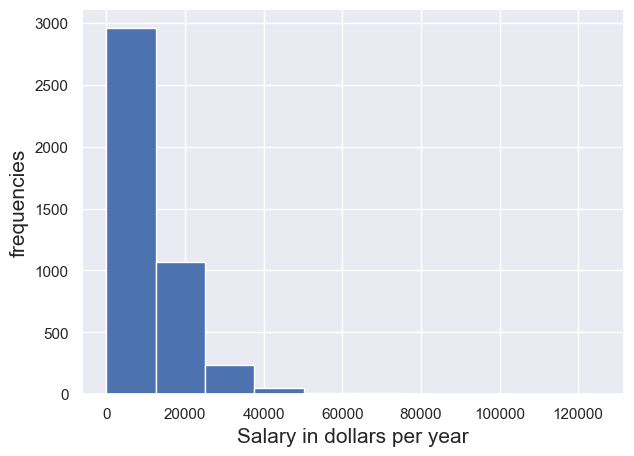

In [289]:
plt.figure(figsize = (7,5))
plt.hist(data.Salary)

plt.xlabel('Salary in dollars per year' , size = 15)
plt.ylabel('frequencies' , size = 15)

```
check that weather we have outliers or not
```

<AxesSubplot: >

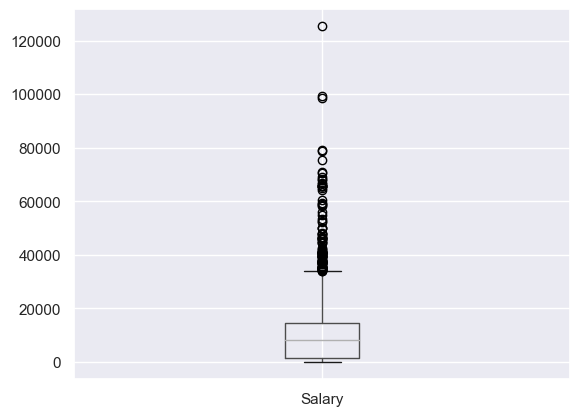

In [291]:
data.boxplot(column='Salary') 

In [292]:
print(f'the mean salary in india in data science is : {data.Salary.mean() :0.3f}')

the mean salary in india in data science is : 10070.180


In [293]:
print(f'the max salary in india in data science is : {data.Salary.max() :0.3f}')

the max salary in india in data science is : 125448.843


In [294]:
print(f'the 75 percent quantile salary in india in data science is : {data.Salary.quantile(0.75) :0.3f}')

the 75 percent quantile salary in india in data science is : 14403.072


# check which locations pays the most

In [295]:
pd.DataFrame(data.groupby('Location')['Salary'].mean()).sort_values(ascending=False , by='Salary')

,Salary
Location,
Bangalore,11699.963948
Pune,9660.067700
New Delhi,9074.974882
Hyderabad,8883.991500
Mumbai,8773.416639


# which city in this field pay the most salary

In [296]:
pd.DataFrame(data.groupby('Job Title')['Salary'].mean()).sort_values(ascending=False , by='Salary')

,Salary
Job Title,
Data Science Manager,60555.365310
Data Science Lead,53335.544100
Data Science Consultant,35022.893040
Lead Data Scientist,24282.197790
Senior Data Scientist,21585.493312
Software Engineer - Machine Learning,20540.485800
Senior Machine Learning Engineer,19010.411873
Machine Learning Software Engineer,18319.219170
Data Science Associate,15783.299430


# which companies give the most salary

In [297]:
data.nlargest(50 , columns = 'Salary')['Company Name'].mode()

0    Goldman Sachs
1           Google
Name: Company Name, dtype: object